In [ ]:
%pylab inline
from Chempy import localpath

In [ ]:
def CL18(self):
    """These are net yields from Chieffi + Limongi 2018 (unpublished), downloaded from http://orfeo.iaps.inaf.it/"""

    datpath=localpath+'/input/yields/CL18/'

    self.metallicities=[0.0134,0.00134,0.000134,0.0000134] # metallicities of [Fe/H]=[0,-1,-2,-3]
    rotations=[0,150,300] # initial rotational velocity in km/s
    self.masses=np.array([13,15,20,25,30,40,60,80,120])
    weight_matrix=np.array([[0.7,0.3,0.],[0.6,0.4,0.],[0.48,0.48,0.04],[0.05,0.7,0.25]])

    self.elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr','Nb','Mo','Xe','Cs','Ba','La','Ce','Pr','Nd','Hg','Tl','Pb','Bi']
    LEN=len(self.elements)
    yield_table={}

    # Import full table with correct rows and data-types
    dt = np.dtype('U8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8')
    
    # Load once in full to find length
    z = np.genfromtxt(datpath+'tab_yieldsnet_ele_exp.dec',skip_header=1,dtype=dt)
    full_len=len(z)+1

    for m,met in enumerate(self.metallicities):
        z,zTot=[],[]
        for rotation_index in range(3):
            header=(3*m+rotation_index)*(LEN+1)+1
            z.append(np.genfromtxt(datpath+'tab_yieldsnet_ele_exp.dec',skip_header=header,skip_footer=full_len-header-LEN,dtype=dt))
            zTot.append(np.genfromtxt(datpath+'tab_yieldstot_ele_exp.dec',skip_header=header,skip_footer=full_len-header-LEN,dtype=dt))

        additional_keys = ['Mass', 'mass_in_remnants','unprocessed_mass_in_winds'] # List of keys for table
        names = additional_keys + self.elements

        # Initialise table and arrays   
        base = np.zeros(len(self.masses))
        list_of_arrays = []
        for i in range(len(names)):
            list_of_arrays.append(base)
        yield_subtable = np.core.records.fromarrays(list_of_arrays,names=names)
        mass_in_remnants = np.zeros(len(self.masses))
        total_mass_fraction = np.zeros(len(self.masses))
        element_mass = np.zeros(len(self.masses))
        yield_subtable['Mass']=self.masses
        tot_yield=np.zeros(len(self.masses))

        for e,el in enumerate(self.elements):
            for m_index in range(len(self.masses)):
                for rotation_index in range(3):
                    yield_subtable[el][m_index]+=z[rotation_index][e][m_index+4]*weight_matrix[m,rotation_index]/self.masses[m_index]
                tot_yield[m_index]+=yield_subtable[el][m_index]

        # Compute total remnant mass
        for m_index,mass in enumerate(self.masses):
            for rotation_index in range(3):
                yield_subtable['mass_in_remnants'][m_index]+=(1.-np.sum([zTot[rotation_index][i][m_index+4] for i in range(len(self.elements))])/mass)*weight_matrix[m,rotation_index]

        # Compute unprocessed mass
        yield_subtable['unprocessed_mass_in_winds']=1.-yield_subtable['mass_in_remnants']-tot_yield

        yield_table[met]=yield_subtable
    self.table=yield_table

In [ ]:
from Chempy.yields import SN2_feedback
b=SN2_feedback()
c=SN2_feedback()
getattr(b,'CL18_net')()
getattr(c,'West17_net')()

In [ ]:
b.table[0.0134]['F'][2:],b.masses[2:]

In [ ]:
c.table[c.metallicities[-1]]['F'][3:],c.masses[3:]

In [5]:
from Chempy.parameter import ModelParameters
a=ModelParameters()
from Chempy.wrapper import Chempy
cube,abun=Chempy(a)

C:\Users\Oliver\Anaconda3\lib\site-packages\numpy\core\records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
C:\Users\Oliver\ChempyScoring\Chempy\wrapper.py:167: RuntimeWarning: invalid value encountered in subtract
  abundances[element] -= abundances['Fe']


In [4]:
a.yield_table_name_sn2

'CL18_net'

In [4]:
from Chempy.neural import create_network

Training epoch 0 of 5000 complete
Training epoch 100 of 5000 complete
Training epoch 200 of 5000 complete
Training epoch 300 of 5000 complete
Training epoch 400 of 5000 complete
Training epoch 500 of 5000 complete
Training epoch 600 of 5000 complete
Training epoch 700 of 5000 complete
Training epoch 800 of 5000 complete
Training epoch 900 of 5000 complete
Training epoch 1000 of 5000 complete
Training epoch 1100 of 5000 complete
Training epoch 1200 of 5000 complete
Training epoch 1300 of 5000 complete
Training epoch 1400 of 5000 complete
Training epoch 1500 of 5000 complete
Training epoch 1600 of 5000 complete
Training epoch 1700 of 5000 complete
Training epoch 1800 of 5000 complete
Training epoch 1900 of 5000 complete
Training epoch 2000 of 5000 complete
Training epoch 2100 of 5000 complete
Training epoch 2200 of 5000 complete
Training epoch 2300 of 5000 complete
Training epoch 2400 of 5000 complete
Training epoch 2500 of 5000 complete
Training epoch 2600 of 5000 complete
Training epoc

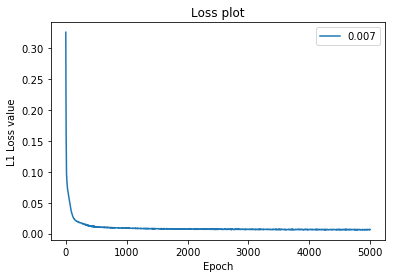

([0,
  3,
  6,
  9,
  12,
  15,
  18,
  21,
  24,
  27,
  30,
  33,
  36,
  39,
  42,
  45,
  48,
  51,
  54,
  57,
  60,
  63,
  66,
  69,
  72,
  75,
  78,
  81,
  84,
  87,
  90,
  93,
  96,
  99,
  102,
  105,
  108,
  111,
  114,
  117,
  120,
  123,
  126,
  129,
  132,
  135,
  138,
  141,
  144,
  147,
  150,
  153,
  156,
  159,
  162,
  165,
  168,
  171,
  174,
  177,
  180,
  183,
  186,
  189,
  192,
  195,
  198,
  201,
  204,
  207,
  210,
  213,
  216,
  219,
  222,
  225,
  228,
  231,
  234,
  237,
  240,
  243,
  246,
  249,
  252,
  255,
  258,
  261,
  264,
  267,
  270,
  273,
  276,
  279,
  282,
  285,
  288,
  291,
  294,
  297,
  300,
  303,
  306,
  309,
  312,
  315,
  318,
  321,
  324,
  327,
  330,
  333,
  336,
  339,
  342,
  345,
  348,
  351,
  354,
  357,
  360,
  363,
  366,
  369,
  372,
  375,
  378,
  381,
  384,
  387,
  390,
  393,
  396,
  399,
  402,
  405,
  408,
  411,
  414,
  417,
  420,
  423,
  426,
  429,
  432,
  435,
  438,
  441,
  

In [5]:
create_network()